<a href="https://colab.research.google.com/github/sandhya-8368/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TED TALK Views Prediction**

TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

# Dataset Information



*   Number of observations: 4,005

*   Number of features: 19





# The dataset contains features like:



 talk_id: Talk identification number provided by TED

title: Title of the talk

speaker_1: First speaker in TED's speaker list

all_speakers: Speakers in the talk

occupations: Occupations of the speakers

about_speakers: Blurb about each speaker

recorded_date: Date the talk was recorded

published_date: Date the talk was published to TED.com

event: Event or medium in which the talk was given

native_lang: Language the talk was given in

available_lang: All available languages (lang_code) for a talk

comments: Count of comments

duration: Duration in seconds

topics: Related tags or topics for the talk

related_talks: Related talks (key='talk_id',value='title')

url: URL of the talk

description: Description of the talk

transcript: Full transcript of the talk



# Target Variable :

 views: Count of views



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Importing Neccesary Libraries

In [ ]:
#importing data manipulation and data visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datatime library for Date columns.
from datetime import datetime
import datetime as dt
from operator import itemgetter

# Importing preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor.
from xgboost import XGBRegressor

# Import metrics libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing graphviz for visualizing decision trees.
import graphviz
import sklearn.tree as tree

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Ted Talk View Predictor/data_ted_talks.csv",encoding="latin1")

# Let's do the Exploratory Data Analysis

In [ ]:
df.shape

(4005, 19)

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

There are only 3 numerical columns in the dataset out of which 1 is target variable and 2 can be used as features and rest all columns are categorical columns

In [ ]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


As per our observation through data sets we came across some columns which are not needed for our EDA. So we refined the data as per our requirements.

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

# Checking and Treating Null values

In [ ]:
#checking for null values
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
#Removing null values
df[["all_speakers","about_speakers","recorded_date","comments"]]=df[["all_speakers","about_speakers","recorded_date","comments"]].fillna(0)

In [ ]:
#Again checking for null values
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        0
occupations       522
about_speakers      0
views               0
recorded_date       0
published_date      0
event               0
native_lang         0
available_lang      0
comments            0
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

# Lets do the analysis and visualization

# 1. The most popular TED speaker according to the views.

In [ ]:
#Getting the top 15 most viewed speakers with the views
popular_speaker_ted=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
popular_speaker_ted.reset_index(inplace=True)
popular_speaker_ted

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,BrenÃ© Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


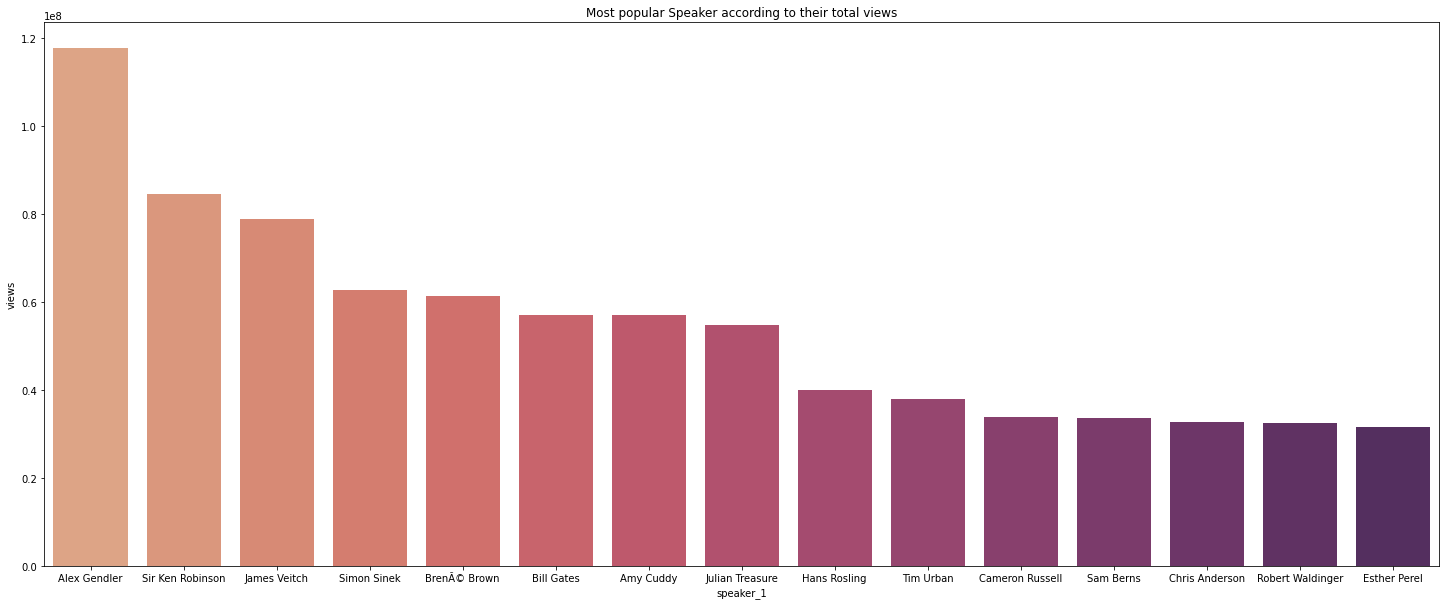

In [ ]:
#plotting the above result
plt.figure(figsize=(25,10))
plt.title('Most popular Speaker according to their total views')
sns.barplot(x='speaker_1', y='views', data=popular_speaker_ted,palette='flare')

# 2. Top 7 watched videos on TED platform

In [ ]:
#Getting top 7 title of the videos with their views
popular_video=df.nlargest(7, ['views'])
popular_video[["views","title"]]

,views,title
4,65051954,Do schools kill creativity?
1296,57074270,Your body language may shape who you are
2062,56932551,This is what happens when you reply to spam email
646,49730580,How great leaders inspire action
796,47544833,The power of vulnerability
1724,41504331,How to speak so that people want to listen
2108,37976820,Inside the mind of a master procrastinator


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

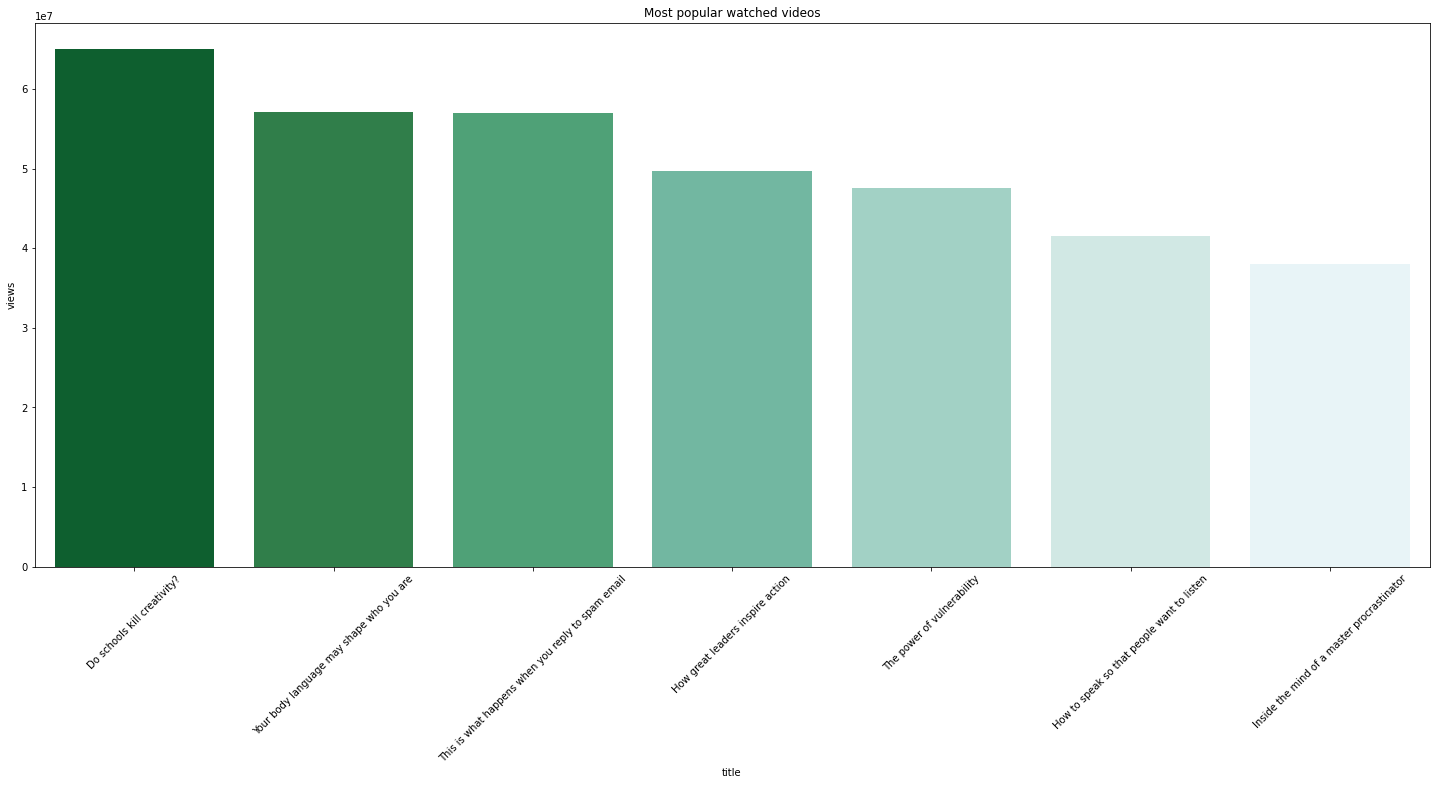

In [ ]:
#plotting the above result
plt.figure(figsize=(25,10))
plt.title("Most popular watched videos")
sns.barplot(x='title',y='views',data=popular_video,palette="BuGn_r")
plt.xticks(rotation=45)

# 3. Most popular Event on TED

In [ ]:
#getting the top 10 number of views on each events
popular_event = df.groupby('event').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_event

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


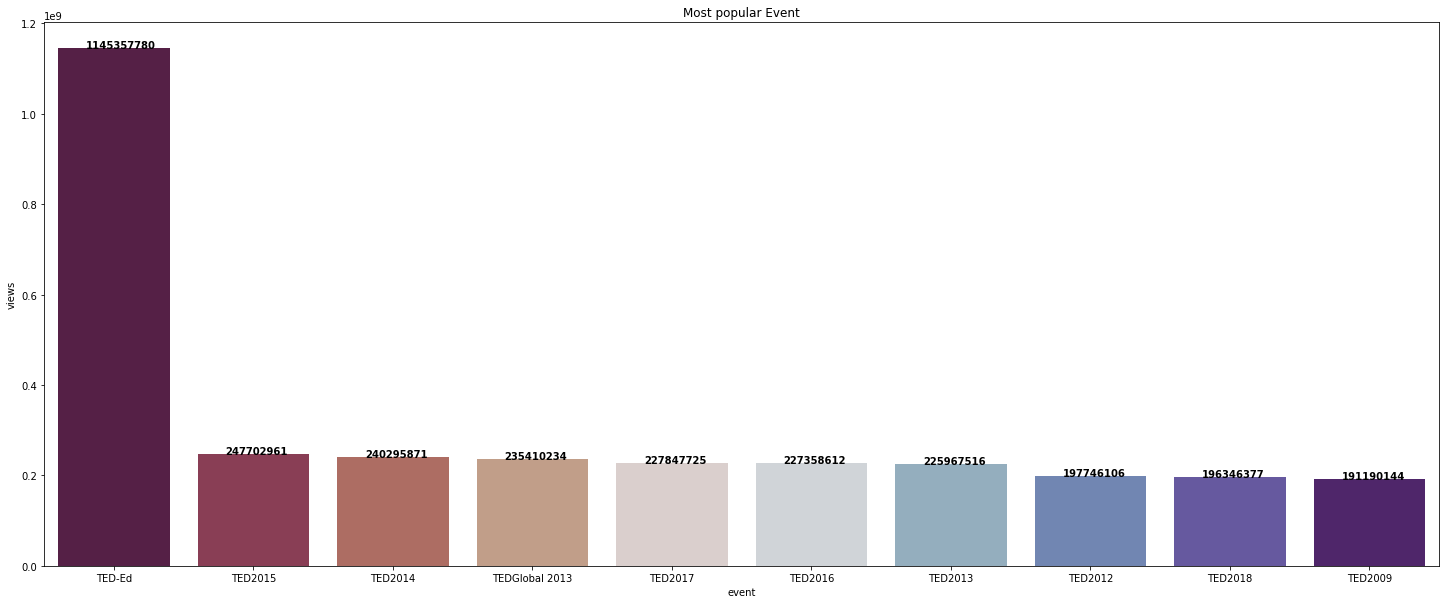

In [ ]:
#plotting the above result
plt.figure(figsize=(25,10))
plt.title("Most popular Event")
sns.barplot(x='event',y='views',data=popular_event,palette="twilight_shifted_r")
for i, v in enumerate(popular_event[['event','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')

# 4. Occupation of most frequent speaker's

In [ ]:
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})

In [ ]:
#applying the eval function on occupations column to convert it into a list
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [ ]:
#defining a new feature
df['occupation'] = 'other'
#iterating through the each row and extracting occupations of speakers
for index, row in df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occup_list)

[Text(0.5, 1.0, "top 10 most frequent speaker's occupations")]

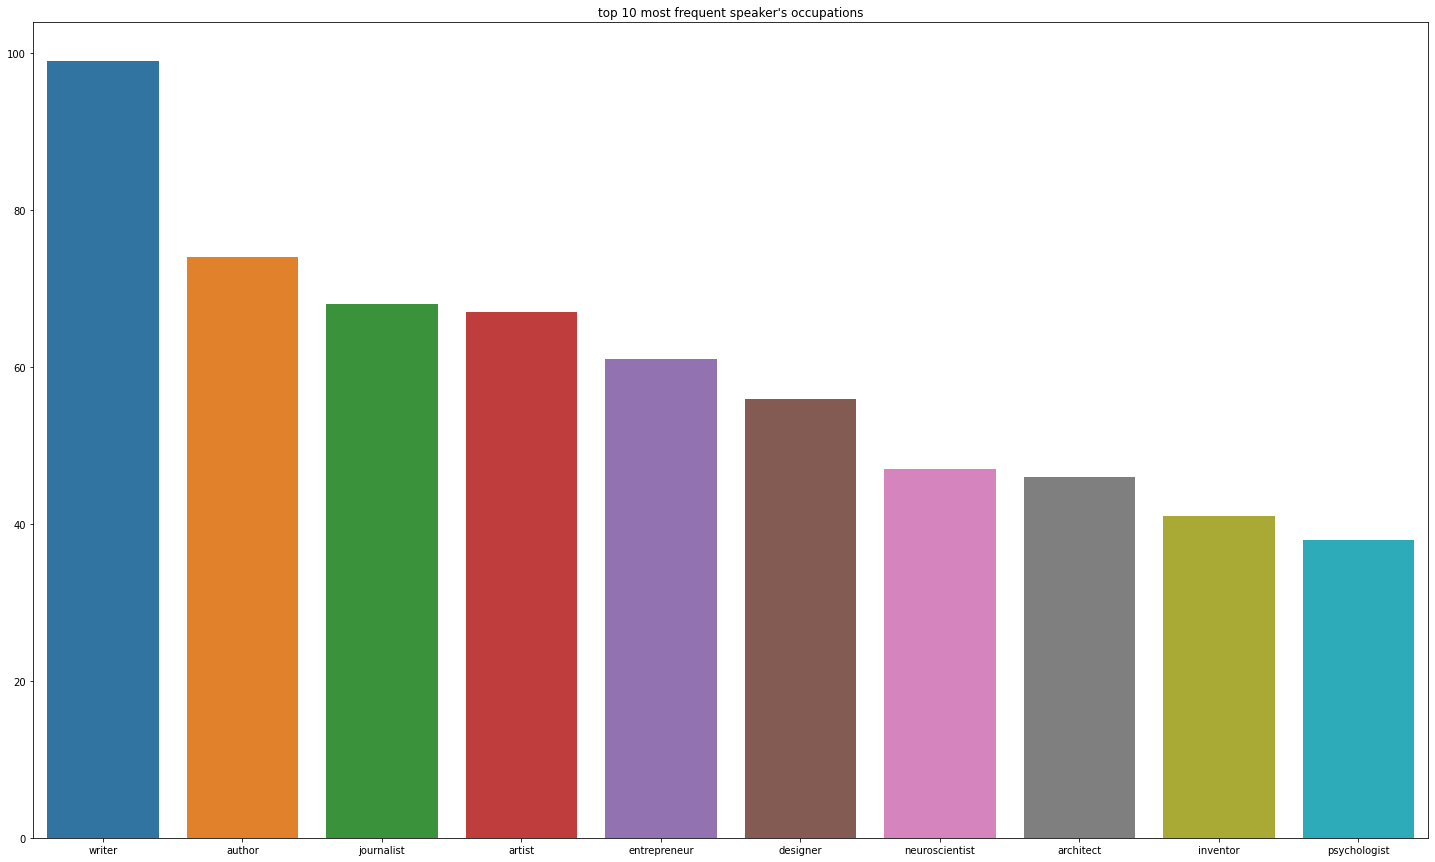

In [ ]:
#plotting the above result
most_occupation=df[df['occupation']!='O']
fig,ax=plt.subplots(figsize=(25,15))
a=sns.barplot(x=most_occupation['occupation'].value_counts(ascending=False).head(10).index, 
              y=most_occupation['occupation'].value_counts(ascending=False).head(10).values, ax=ax)
a.set(title="top 10 most frequent speaker's occupations")

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'occupation'],
      dtype='object')

# 5. Native language used most on the TED platform

In [ ]:
#Getting the counts of different languages
df['native_lang'].value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

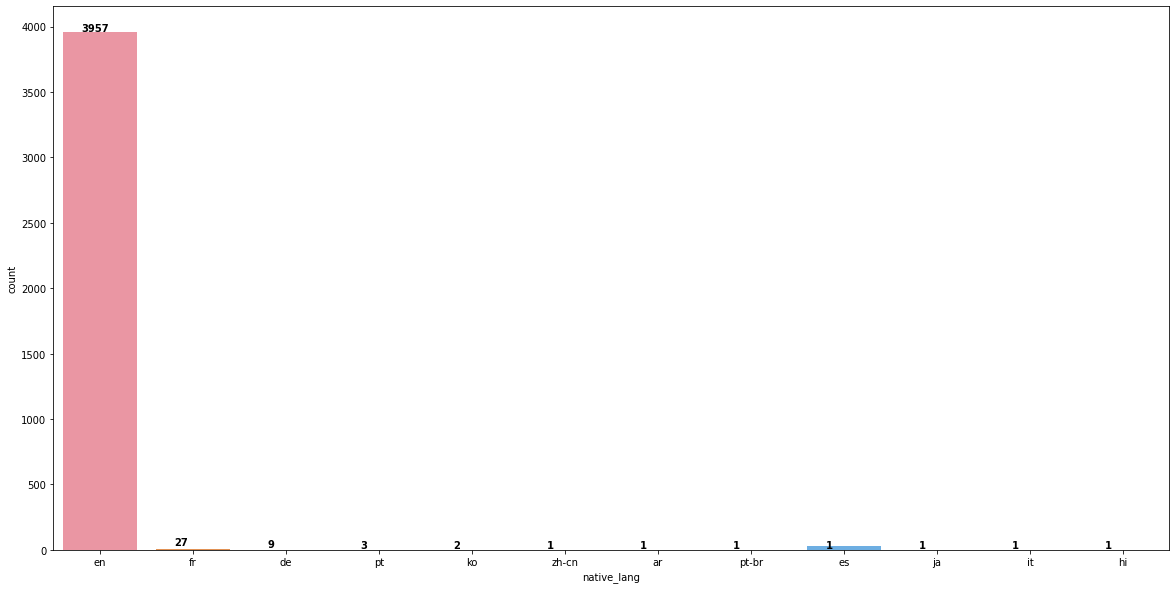

In [ ]:
#plotting the above result
plt.figure(figsize=(20,10))
sns.countplot(x='native_lang', data=df)

#show count of each language in native_lang column
for i, v in enumerate(df['native_lang'].value_counts()):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')

# 6. Most frequent release day of the week

In [ ]:
#applying strptime on published_date column
df['published_date'] = df['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#extracting release day, month and year from the published date column
#adding 3 separate columns as release_day,release_month,release_year
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)
     

In [ ]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

In [ ]:
#checking the most frequent release day of the week
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

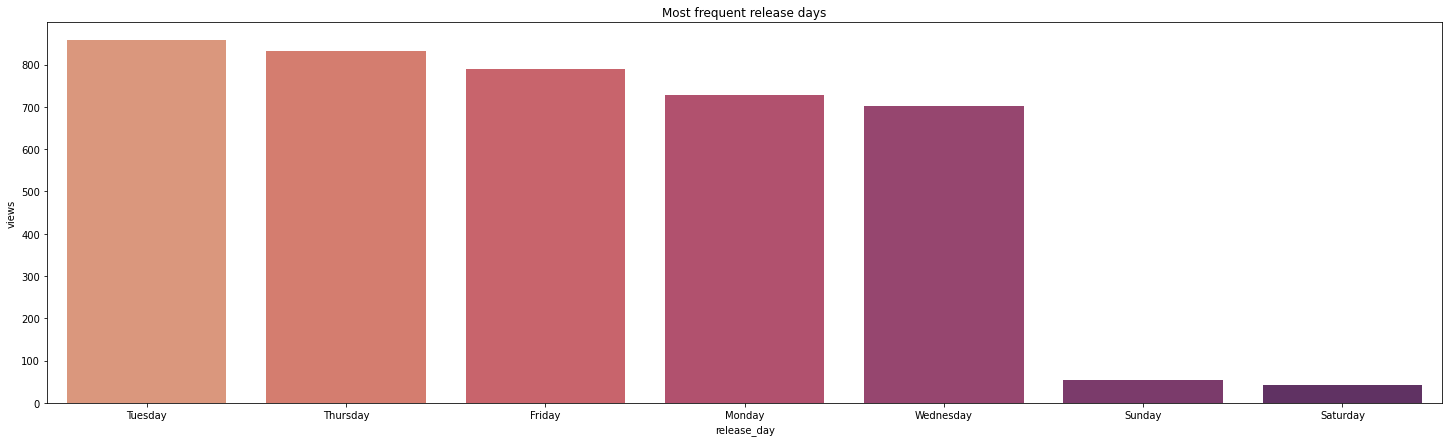

In [ ]:
#plotting the above result
plt.figure(figsize=(25,7))
sns.barplot(x='release_day',y='views',data=freq_rel_day,palette="flare")
plt.title('Most frequent release days')

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'occupation',
       'release_day', 'release_month', 'release_year'],
      dtype='object')

# Best release day of the week with respect to average views

In [ ]:
#checking the most popular  release day based on average  views
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

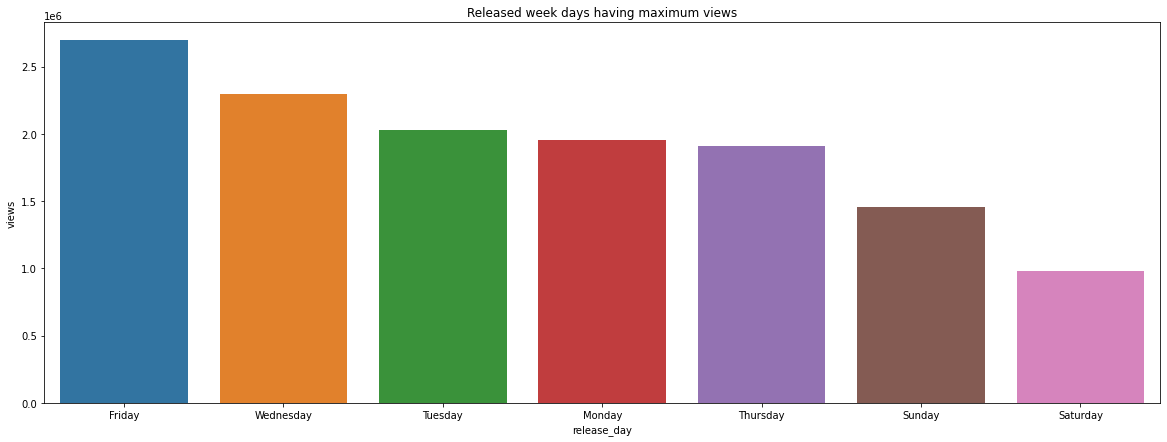

In [ ]:
#plotting the above result
plt.figure(figsize=(20,7))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)



*   Most videos are published on **Tuesday** followed by **Thursday**.


* But the videos published on Friday are more popular (i.e. have more average 
views) followed by **wednesday**. 



# 7. Most frequent release Month

In [ ]:
#encoding of release_day column with corresponding week day name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

In [ ]:
#checking the most frequent release month in year
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release months')

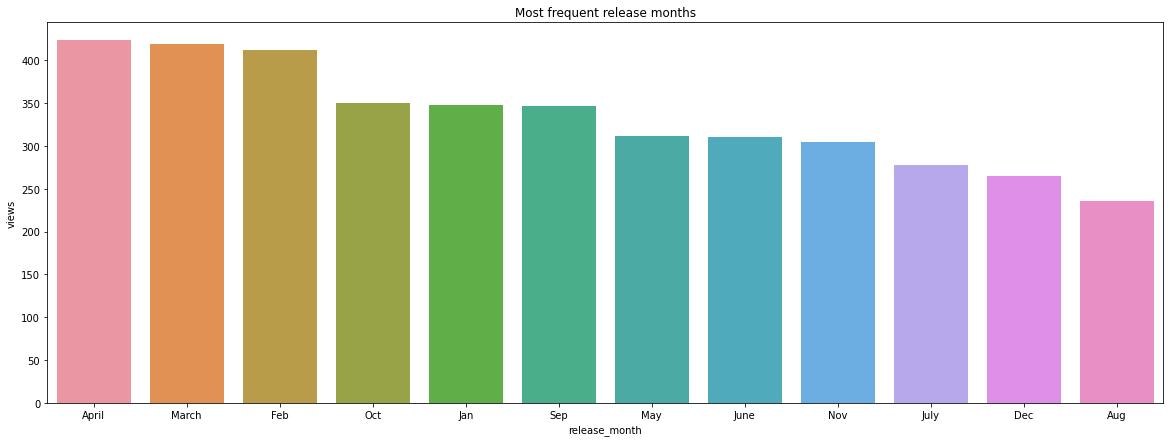

In [ ]:
#plotting the above result
plt.figure(figsize=(20,7))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')



* **April** have maximum released videos





# Released months having maximum average views

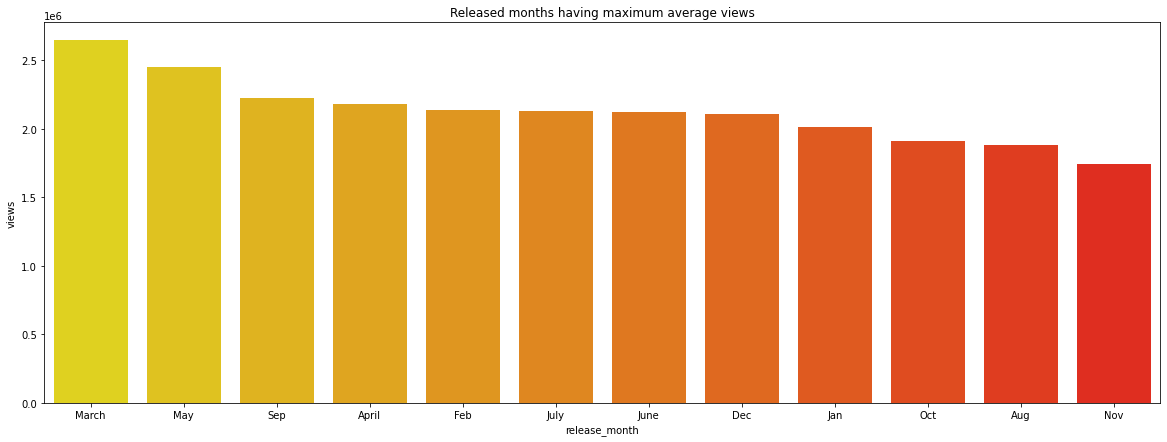

In [ ]:
#getting the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

#plotting the above result
plt.figure(figsize=(20,7))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month,palette="autumn_r")


*   videos released in **March** are more popular followed by **May** and **September**.



# 8. Most frequent release years

Text(0.5, 1.0, 'Most frequent release years')

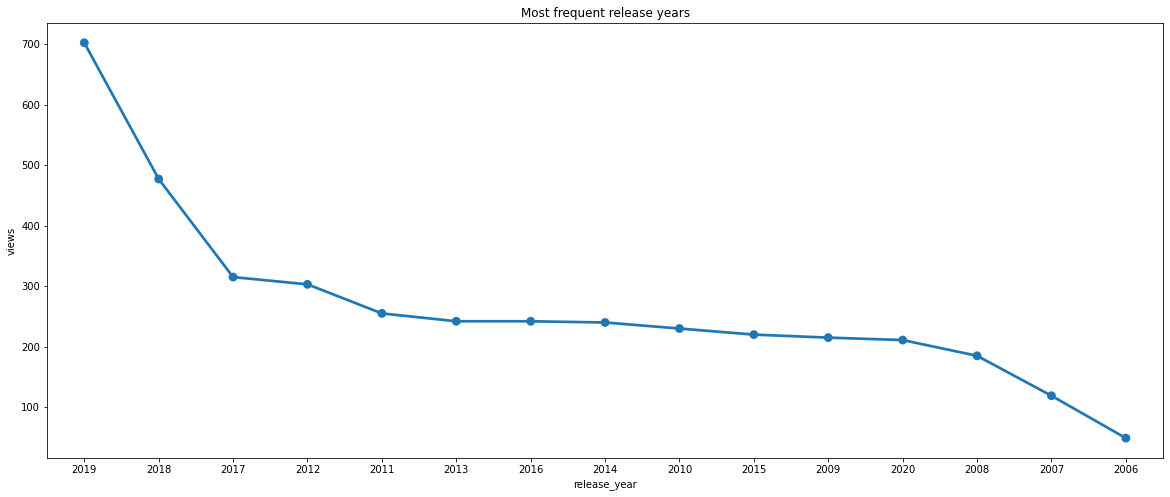

In [ ]:
#getting years having maximum release
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

#plotting the above result
plt.figure(figsize=(20,8))
sns.pointplot(x='release_year',y='views',data=freq_rel_year, order=freq_rel_year.sort_values('views',ascending = False).release_year)
plt.title('Most frequent release years')
     



* Most videos are published in **2019** followed by **2018** and **2017**



# Feature Engineering

**Feature engineering is the process of using domain knowledge to extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.**

# Feature Engineering on Speaker_1 column

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,duration,topics,related_talks,url,description,transcript,occupation,release_day,release_month,release_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,...,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,...,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,Tuesday,June,2006
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,activist for environmental justice,Tuesday,June,2006
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,Tuesday,June,2006


In [ ]:
ted_speaker_1_views = df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
ted_speaker_1_views = ted_speaker_1_views.to_dict()
ted_speaker_1_views = ted_speaker_1_views.values()
ted_speaker_1_views = list(ted_speaker_1_views)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(ted_speaker_1_views)

In [ ]:
df['speaker_1_avg_views'].sort_values(ascending=False)

1296    57074270.0
2220    39421820.5
2062    39421820.5
2108    37976820.0
1366    33874546.0
           ...    
3696       10680.0
2753       10356.0
3056           0.0
3068           0.0
4004           0.0
Name: speaker_1_avg_views, Length: 4005, dtype: float64

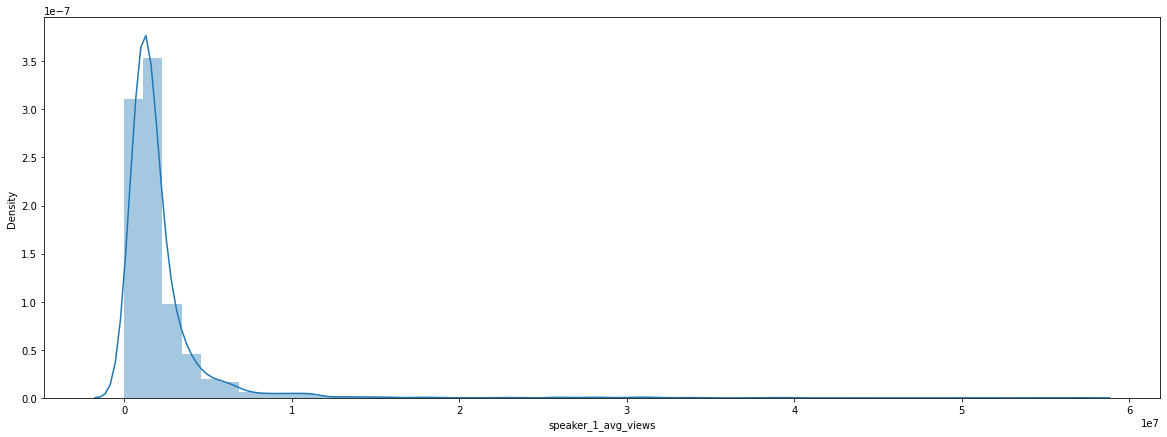

In [ ]:
plt.figure(figsize=(20,7))
sns.distplot(df['speaker_1_avg_views'])

In [ ]:
#skew and kurtosis of speaker_1_avg_views
print("Skew: {}".format(df['speaker_1_avg_views'].skew()))
print("Kurtosis: {}".format(df['speaker_1_avg_views'].kurt()))

Skew: 7.115405827114308
Kurtosis: 73.76388793182939


**It is rightly Skewed.

# Feature Engineering on event column

In [ ]:
event_list = df['event'].unique().tolist()

In [ ]:
ted_talks_event = df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
ted_talks_event = ted_talks_event.to_dict()
ted_talks_event = ted_talks_event.values()
ted_talks_event = list(ted_talks_event)[0]
df['event_avg_views']=df['event'].map(ted_talks_event)

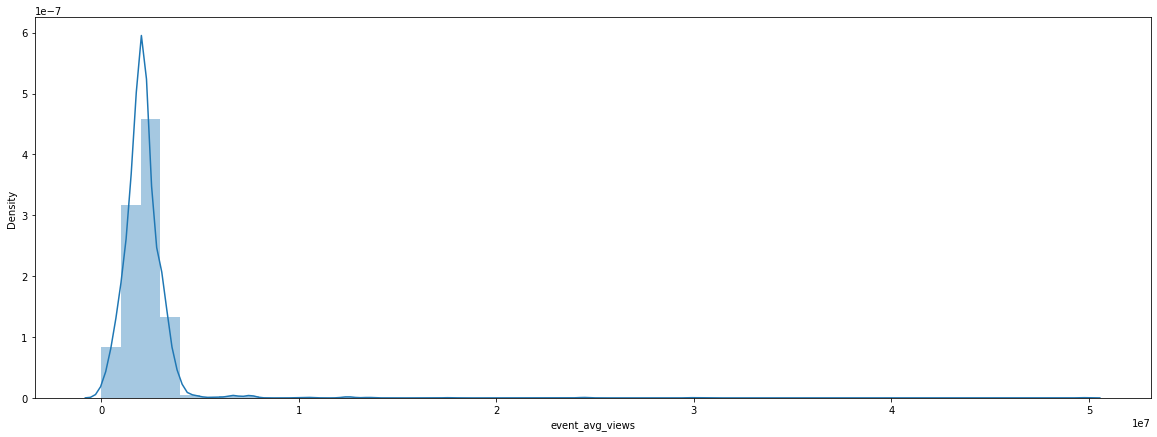

In [ ]:
plt.figure(figsize=(20,7))
sns.distplot(df['event_avg_views'])

In [ ]:
#skew and kurtosis of event_avg_views
print("Skew: {}".format(df['event_avg_views'].skew()))
print("Kurtosis: {}".format(df['event_avg_views'].kurt()))

Skew: 14.4139778252541
Kurtosis: 382.42506115325733


**It is rightly skewed**

# Feature Engineering on available_lang column

In [ ]:
df['available_lang'] = df['available_lang'].apply(eval)

In [ ]:
df['available_lang_count'] = df['available_lang'].apply(lambda x: len(x))
df['available_lang_count']

0       43
1       49
2       26
3       35
4       62
        ..
4000     1
4001     4
4002     1
4003     1
4004     1
Name: available_lang_count, Length: 4005, dtype: int64

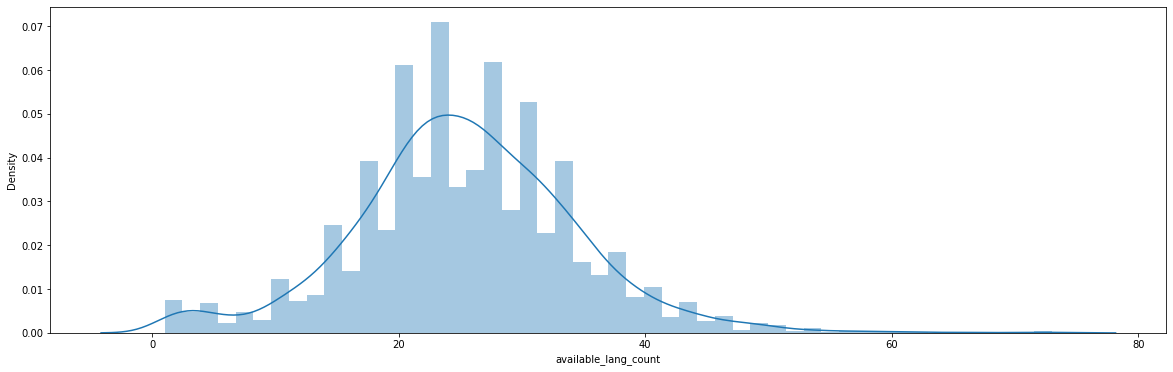

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(df['available_lang_count'])

In [ ]:
#skew and kurtosis of available_lang_count
print("Skew: {}".format(df['available_lang_count'].skew()))
print("Kurtosis: {}".format(df['available_lang_count'].kurt()))


Skew: 0.18591487604734994
Kurtosis: 1.2461367402327443




* As Skewness is less than 1 , it is normal distribution



# Feature Engineering on topics column

In [ ]:
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

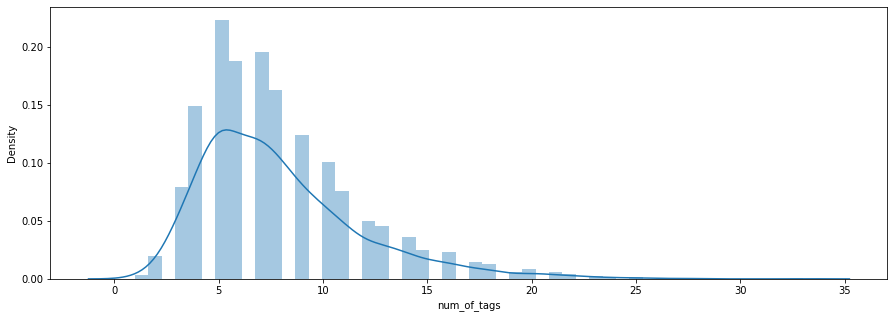

In [ ]:
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)
plt.figure(figsize=(15,5))
sns.distplot(df['num_of_tags'])
    

# Feature Engineering on published_date column.

In [ ]:
df['video_age'] = 2022-df['release_year']
df['video_age']

0       16
1       16
2       16
3       16
4       16
        ..
4000     2
4001     2
4002     2
4003     2
4004     2
Name: video_age, Length: 4005, dtype: int64

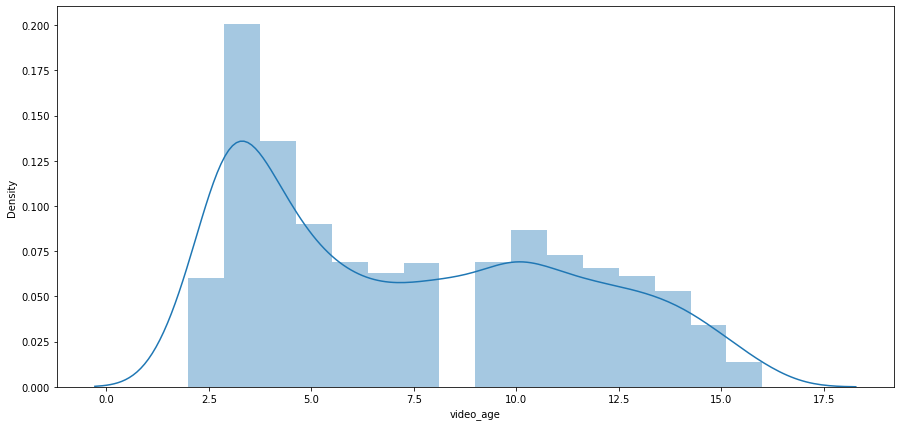

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df['video_age'])

Now, we can drop published_date column.

In [ ]:
df=df.drop(columns='published_date')

# Creating a copy of ted_talks

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'occupation', 'release_day',
       'release_month', 'release_year', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'num_of_tags', 'video_age'],
      dtype='object')

In [ ]:
new_ted_talks = df.copy()
df=new_ted_talks.copy()

In [ ]:
df.columns


Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'occupation', 'release_day',
       'release_month', 'release_year', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'num_of_tags', 'video_age'],
      dtype='object')

# Data Cleaning.

# Outlier Detection and Treatment

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'occupation', 'release_day',
       'release_month', 'release_year', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'num_of_tags', 'video_age'],
      dtype='object')

In [ ]:
#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers            0
all_speakers              0
available_lang            0
available_lang_count    121
comments                297
description               0
duration                 21
event                     0
event_avg_views         156
native_lang               0
num_of_tags             116
occupation                0
occupations               0
recorded_date             0
related_talks             0
release_day               0
release_month             0
release_year              0
speaker_1                 0
speaker_1_avg_views     373
talk_id                 119
title                     0
topics                    0
transcript                0
url                       0
video_age                 0
views                   393
dtype: int64

In [ ]:
# Replacing outliers with extreme values
for i in ['available_lang_count','comments','duration','event_avg_views','num_of_tags','speaker_1_avg_views','talk_id','views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))
     

In [ ]:
#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
     

about_speakers          0
all_speakers            0
available_lang          0
available_lang_count    0
comments                0
description             0
duration                0
event                   0
event_avg_views         0
native_lang             0
num_of_tags             0
occupation              0
occupations             0
recorded_date           0
related_talks           0
release_day             0
release_month           0
release_year            0
speaker_1               0
speaker_1_avg_views     0
talk_id                 0
title                   0
topics                  0
transcript              0
url                     0
video_age               0
views                   0
dtype: int64

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'occupation', 'release_day',
       'release_month', 'release_year', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'num_of_tags', 'video_age'],
      dtype='object')

In [ ]:
#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','event','title','speaker_1', 'all_speakers', 'occupations','native_lang','available_lang','url','release_day','release_month',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','occupation','release_year'],inplace=True)

In [ ]:
df.columns

Index(['views', 'comments', 'duration', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'num_of_tags', 'video_age'],
      dtype='object')

In [ ]:
df.columns

Index(['views', 'comments', 'duration', 'speaker_1_avg_views',
       'event_avg_views', 'available_lang_count', 'num_of_tags', 'video_age'],
      dtype='object')

In [ ]:
df['comments'].isna().sum()

0

In [ ]:
#splitting the predictors and target to avoid alterations in the target variable
x=df.drop(['views'],axis=1)
y=df['views']

In [ ]:
#One Hot encoding on categorical features.
x=pd.get_dummies(x)
x.shape

(4005, 7)

In [ ]:
df['views'] = df['views'].astype('int64')
df['comments'] = df['comments'].astype('int64')
df['duration'] = df['duration'].astype('int64')

In [ ]:
num_df=['comments','duration','speaker_1_avg_views','event_wise_avg_views','available_lang_count','num_of_tags','video_age']
     

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
f_scores=f_regression(x,y)
f_scores

(array([8.50650667e+02, 3.63920086e+01, 1.61894391e+04, 6.21645241e+02,
        9.43117088e+02, 2.22138034e+00, 7.26280093e-01]),
 array([9.70498315e-170, 1.75975910e-009, 0.00000000e+000, 1.13785436e-127,
        3.67017071e-186, 1.36190106e-001, 3.94142602e-001]))

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Columns: 8 entries, views to video_age
dtypes: float64(4), int64(4)
memory usage: 250.4 KB


In [ ]:
corr = df.corr()

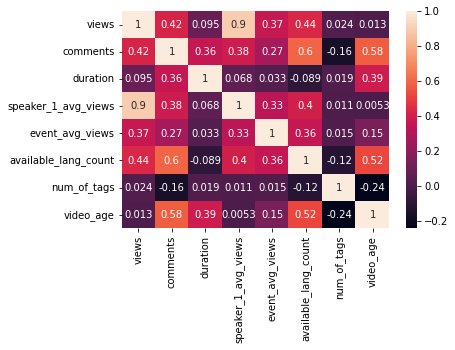

In [ ]:
sns.heatmap(corr,annot=True)
     

# Model Building

In [ ]:
#Applying train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)
     

# Fitting the regression models and HyperParameter Tuning

**Linear regression model**

In [ ]:
#fitting the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x_train,y_train)

#predicting the values for train and test set
reg_pred_train=reg.predict(x_train)
reg_pred_test=reg.predict(x_test)

MSE=mean_squared_error(y_test,reg_pred_test)
RMSE=np.sqrt(MSE)
print('RMSE on test set: ',RMSE)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, reg_pred_train)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, reg_pred_test)))
     

RMSE on test set:  424644.19019070023
Training MAE: 271426.41
Test MAE: 243353.57


**Random Forest Regressor**

In [ ]:
#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 98017.94
Test MAE: 216094.19
Target mean: 1661354.12
Target std: 1102595.71


In [ ]:
"""Using Randomised Search to tune the hyperparameters
Defining the parameters"""
n_estimators=[100,150,200]
max_depth=[6,8,10]
min_samples_split=[50,100,150]
min_samples_leaf=[10,30,50]
param_dict={'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#creating an instance of the model.
rf_instance=RandomForestRegressor(criterion='mae')
from sklearn.model_selection import KFold
rf_random=RandomizedSearchCV(estimator=rf_instance,param_distributions=param_dict,verbose=0,cv=KFold())
rf_random.fit(x_train,y_train)
     

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [6, 8, 10],
                                        'min_samples_leaf': [10, 30, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]})

In [ ]:
print('Best : {}, using {}'.format(rf_random.best_score_,rf_random.best_params_))

Best : 0.8087535994006615, using {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 6}


In [ ]:
#creating the optimised model
rf_optimal=rf_random.best_estimator_
rf_optimal

RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=10,
                      min_samples_split=50)

In [ ]:
#calculating the MAE
y_pred=rf_optimal.predict(x_train)
y_test_pred=rf_optimal.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
     

Training MAE: 182187.57
Test MAE: 167261.37


In [ ]:
#storing the results in a dataframe
rf=RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=100,n_estimators=200)
rf_optimal_model=rf.fit(x_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'RandomForestRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, rf_optimal_model.predict(x_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, rf_optimal_model.predict(x_test))
model_dict["R2_Score_train"] = r2_score(y_train,rf_optimal_model.predict(x_train))
model_dict["R2_Score_test"] = r2_score(y_test,rf_optimal_model.predict(x_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,rf_optimal_model.predict(x_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,rf_optimal_model.predict(x_test)))
model_data.append(model_dict)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,184593.996774,168625.768565,0.824276,0.843012,462023.026069,437461.649123


**XGBoost Regressor**

In [ ]:
# Number of trees
n_estimators = [100,150,200]
# Maximum depth of trees
max_depth = [6,8,10]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=0,cv=KFold())
xgb_random.fit(x_train,y_train)
     

[17:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:20:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(),
                   param_distributions={'max_depth': [6, 8, 10],
                                        'min_samples_leaf': [30, 40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]})

In [ ]:
print('Best : {}, using {}'.format(xgb_random.best_score_,xgb_random.best_params_))

Best : 0.8272215457394607, using {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 30, 'max_depth': 6}


In [ ]:
xgb_optimal_model=xgb_random.best_estimator_

In [ ]:
y_pred = xgb_optimal_model.predict(x_train)
y_test_pred = xgb_optimal_model.predict(x_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 119053.88
Test MAE: 207756.24


In [ ]:
#storing the results in a dataframe
xgb=XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=6, min_samples_leaf=50,
             min_samples_split=100, n_estimators=100)
xgb_optimal_model=xgb.fit(x_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'XGBRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, xgb_optimal_model.predict(x_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, xgb_optimal_model.predict(x_test))
model_dict["R2_Score_train"] = r2_score(y_train,xgb_optimal_model.predict(x_train))
model_dict["R2_Score_test"] = r2_score(y_test,xgb_optimal_model.predict(x_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,xgb_optimal_model.predict(x_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,xgb_optimal_model.predict(x_test)))
model_data.append(model_dict)

results_df_xgb = pd.DataFrame(model_data)

#printing the results_df_xgb 
results_df_xgb

[17:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,XGBRegressor,119053.882723,207756.244264,0.959202,0.864997,222622.281641,405676.238216


In [ ]:
#storing the results from all the models in a dataframe
#Defining all these models
models = [
           ['Linear Regressor: ', LinearRegression()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=10,min_samples_leaf=10,min_samples_split=100,n_estimators=200)],
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=6, min_samples_leaf=50,
             min_samples_split=100, n_estimators=100)]        
        ]
model_data = []
for name,curr_model in models :
    model_dict = {}
    curr_model.random_state = 78
    model_dict["Model_Name"] = name
    curr_model.fit(x_train,y_train)
    model_dict["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(x_train))
    model_dict["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(x_test))
    model_dict["R2_Score_train"] = r2_score(y_train,curr_model.predict(x_train))
    model_dict["R2_Score_test"] = r2_score(y_test,curr_model.predict(x_test))
    model_dict["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(x_train)))
    model_dict["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(x_test)))
    model_data.append(model_dict)

[17:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
comparision_df = pd.DataFrame(model_data)
comparision_df

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,Linear Regressor:,271426.406984,243353.572203,0.817797,0.852077,470463.242875,424644.190191
1,RandomForest,185073.044740,168953.278409,0.824455,0.843878,461787.905148,436254.719680
2,XGBRegressor:,119053.882723,207756.244264,0.959202,0.864997,222622.281641,405676.238216


# Final selection of the model

We choose **MAE** and not **RMSE** as the deciding factor of our model selection because of the following reasons:

RMSE is heavily influenced by outliers as in the higher the values get the more 
the RMSE increases.

MAE doesn’t increase with outliers. MAE is linear.

From the MAE we can conclude that Random Forest Regressor is the best model for this dataset.

In [ ]:
#let's print the scores of Random Forest Regressor model 
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,184593.996774,168625.768565,0.824276,0.843012,462023.026069,437461.649123


# **Conclusion**

Started with loading the data so far we have done EDA ,feature engineering , data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.

So far we have modelled on

*  Linear Regression
*  Random Forest Regressor
*  XGB Regressor






In all of the models, the errors have been in the range of 2,00,000 which is around 10% of the average views. This implies that the prediction was correct 90% of the time.

The Hyperparameter Tuning prevented overfitting and decreased errors by regularzing the models.

Given that there are only 10% errors, the models have performed well on unseen data.

The Random Forest Regressor performed the best in terms of Mean Absolute Error.